# Linear Algebra (CpE210A)
## Laboratory 2: Plotting Vectors using NumPy and MatPlotLib

Coded and submitted by:
<br>Parco, Jovian Asher G,
<br>58010

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Part 1

In [7]:
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) #Create an array with a random number from -10 to 10 in
    lat = np.random.randint(-10,10, size=3)  # a 1 dimention with the size of 6
                                            
    dist1 = np.array([lat[0] ,long[0]])        
    dist2 = np.array([lat[1] ,long[1]])
    dist3 = np.array([lat[2] ,long[2]])

    dist_total = lat.sum(axis=0),long.sum(axis=0) ##explain sum()
    disp = np.sqrt(np.add(lat.sum(axis=0)**2,long.sum(axis=0)**2)) 
    alpha = 10**-6
    theta = np.arctan(np.divide(long.sum(axis=0),np.add(lat.sum(axis=0),alpha)))                         
    theta = np.degrees(theta)                
    ## Plot ##
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2           ##Vector Shape
    
    ## Ploting ##
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
               label='Displacement: {:.2f}m. @ {:.2f}'.format(disp,theta))

    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()

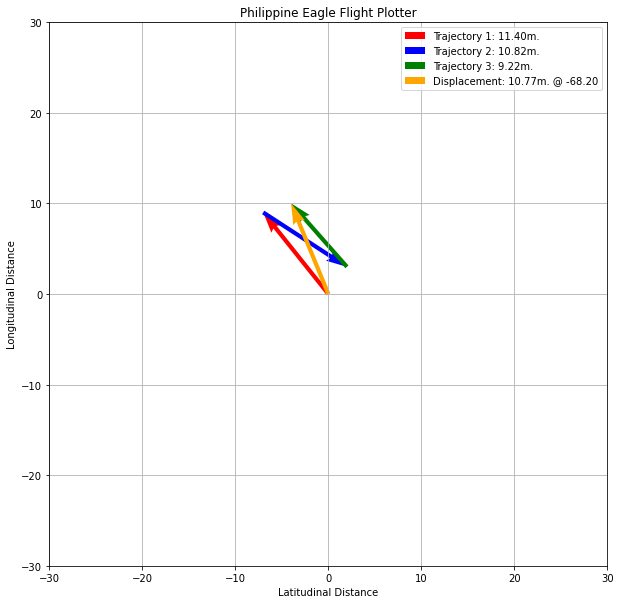

In [8]:
track_eagle(make_figs=False)

## Part2

$$Multiplier=x \\
Vector=[\hat{a},\hat{b},\hat{c},\hat{d}]\\
(\hat{a}x^3)+(\hat{b}x^2)+(\hat{c}x)+(\hat{d})=First Eq\\
(3\hat{a}x^2)+(2\hat{b}x)+(\hat{c})=Second Eq\\
(6\hat{a}x)+(2\hat{b})=Third Eq$$

In [9]:
def eagle_kinematics(vector,multiplier):
    if vector.shape == (4,):
        first = np.sum(np.multiply([vector],[multiplier**3, multiplier**2, multiplier, 1]))
        second = np.sum(np.multiply([3*vector[0],2*vector[1],vector[2]],[multiplier**2, multiplier, 1])) 
        third = np.sum(np.multiply([6*vector[0],2*vector[1]],[multiplier,1]))
        return(first,second,third)
    else:
        print ("Need exaclty Four element to work")
        
        
x = np.array([1,2,3,4])
t = 2
eagle_kinematics(x, t)



(26, 23, 16)

## Part 3

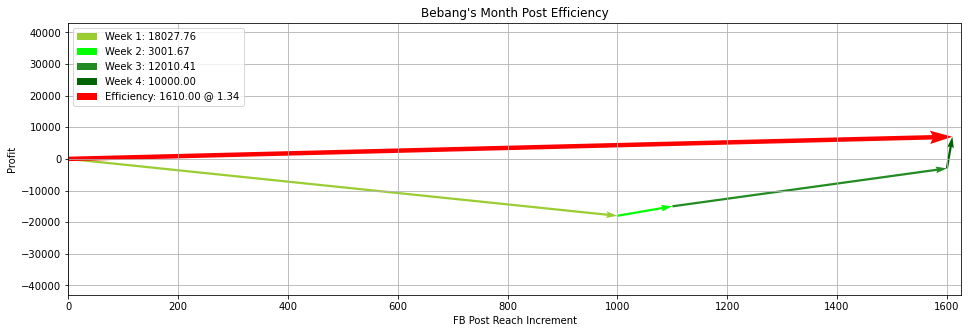

In [11]:
def month_profit_trace(profit, reach, make_figs=True): ## You can simplify/ optimize this code for extra points
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 = np.array((reach[3], profit[3]))
        
        week_total = reach.sum(axis=0),profit.sum(axis=0)     
        week_performance = reach.sum(axis=0)
        alpha = 10**-6
        reach_gradient = np.arctan(np.divide(profit.sum(axis=0),np.add(reach.sum(axis=0),alpha)))
        

        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        
        plt.quiver(week1[0],week1[1], week2[0], week2[1], 
                   angles='xy', scale_units='xy',scale=1, color='lime', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        
        plt.quiver(np.add(week1[0],week2[0]),np.add(week1[1],week2[1]),week3[0], week3[1], 
                   angles='xy', scale_units='xy',scale=1, color='forestgreen', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        
        plt.quiver(week1[0]+week2[0]+week3[0],week2[1]+week3[1]+week1[1],week4[0], week4[1], 
                   angles='xy', scale_units='xy',scale=1, color='darkgreen', width=0.0025,
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
        
        ## put necessary vector plotting code here

        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                  label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Dimension error') ## Make a more appropriate error statement. 

profit= np.array([-18000, 3000, 12000, 10000])    ## You can change the values to make different scenarios
reach = np.array([1000, 100, 500, 10])             ## You can change the values to make different scenarios

month_profit_trace(profit, reach, make_figs=False)